<a href="https://colab.research.google.com/github/CherukuriRamCharan/ProjectonML/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

2.Loading the dataset named "insurance.csv"

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


3.Exploratory Data Analysis

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


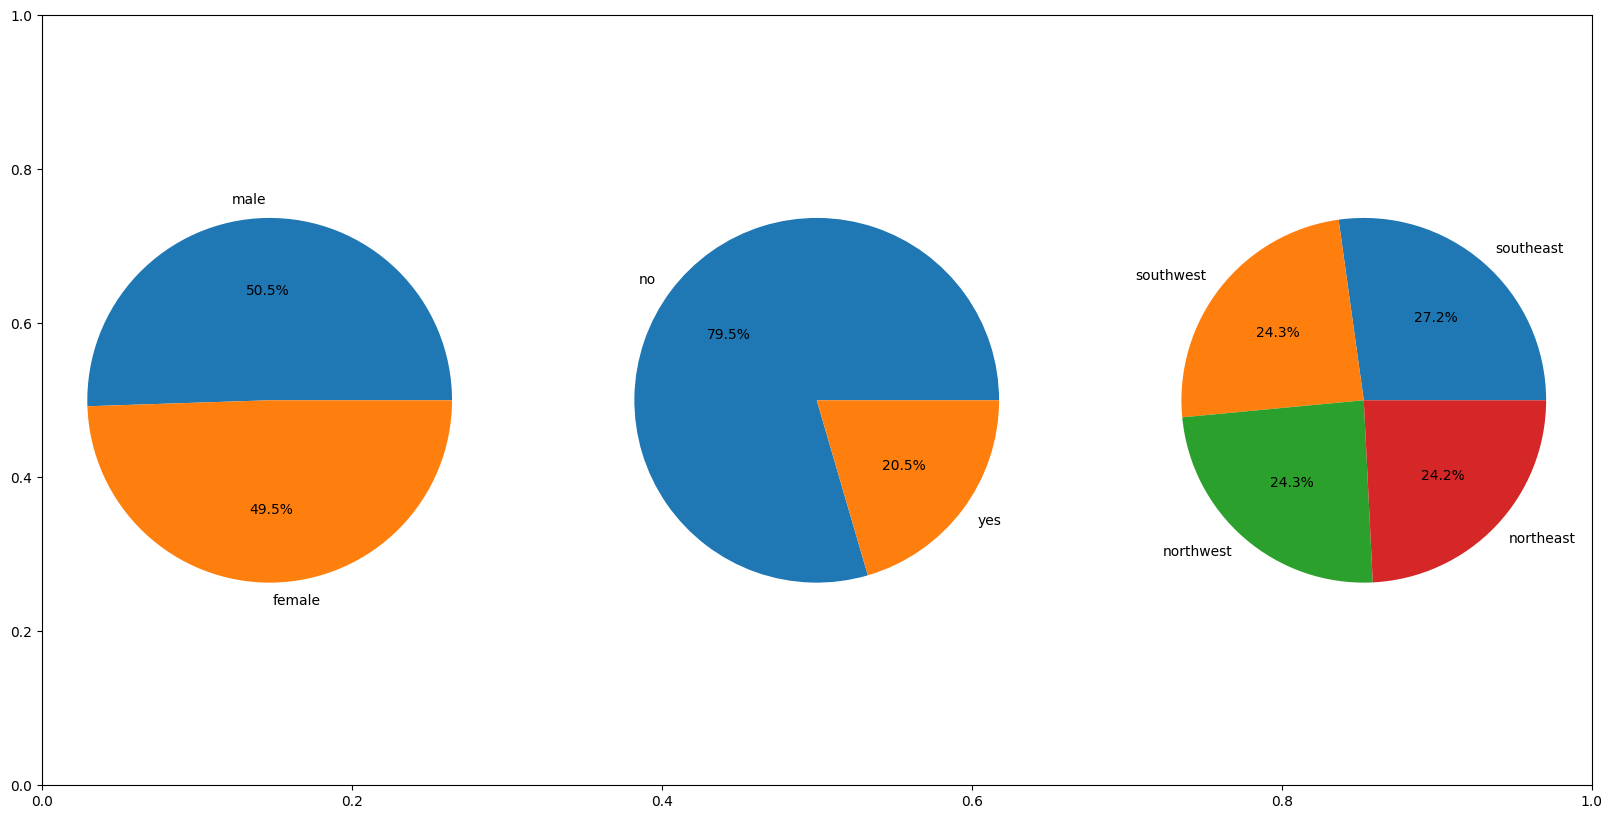

In [ ]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


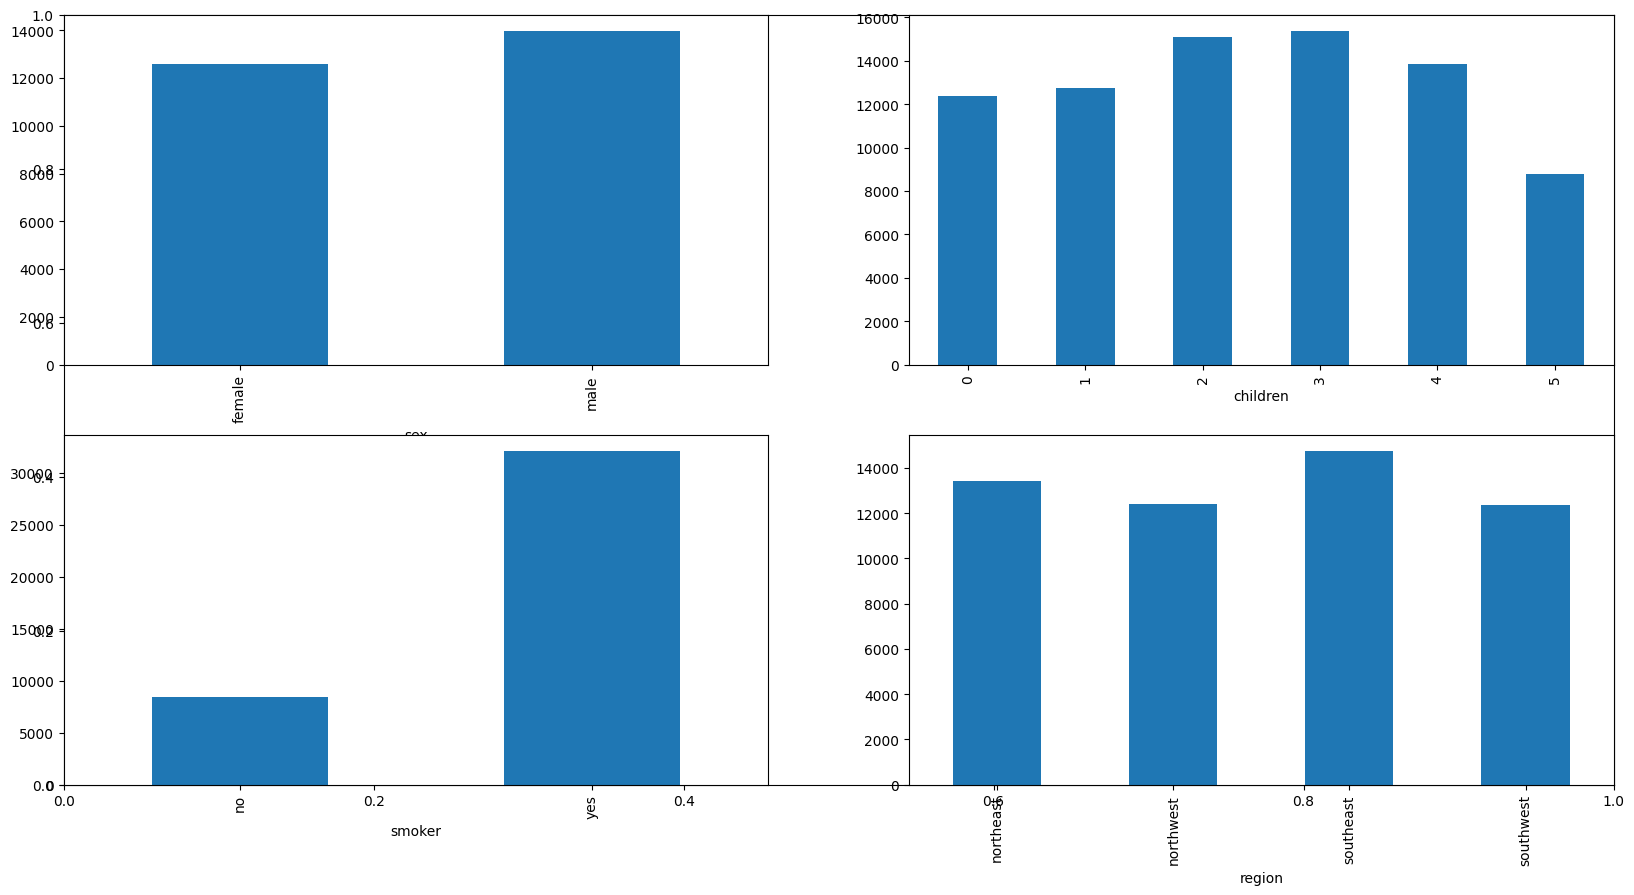

In [ ]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['expenses'].mean().astype(float).plot.bar()
plt.show()

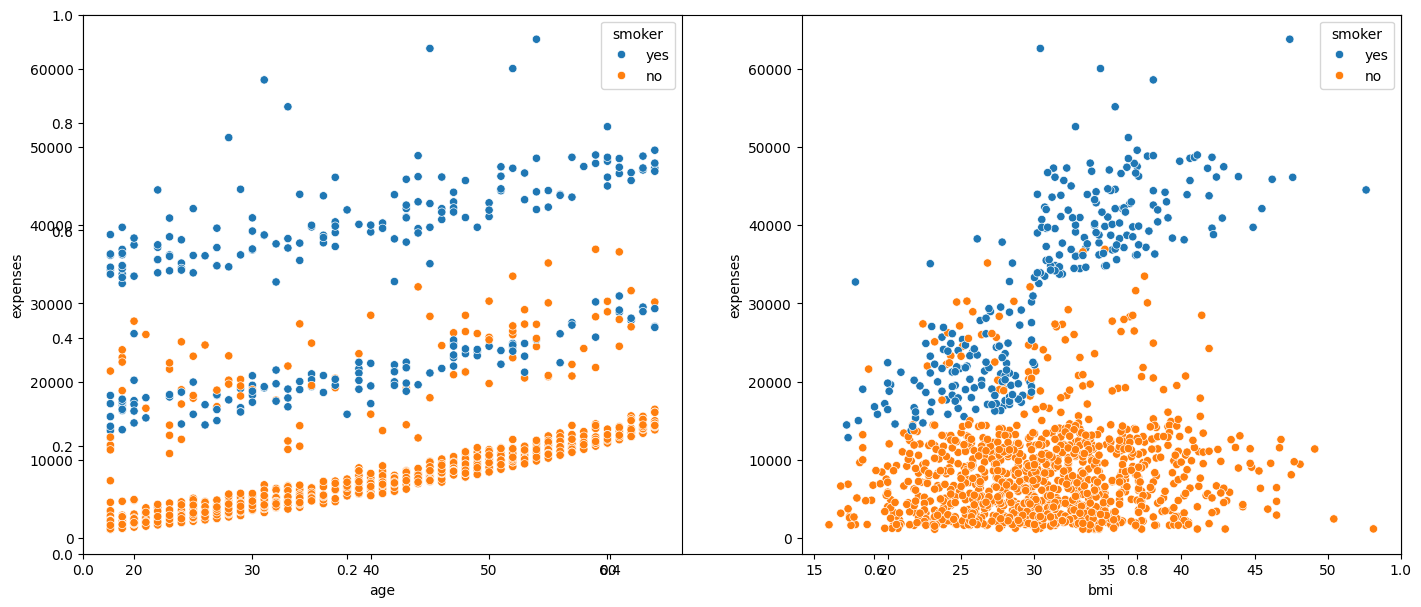

In [ ]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='expenses',
                   hue='smoker')
plt.show()


Data Preprocessing

<Axes: ylabel='age'>

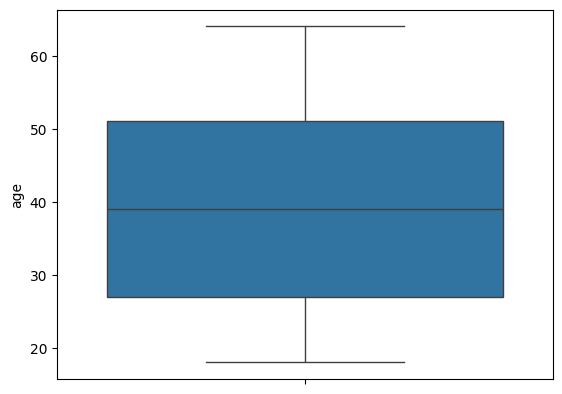

In [ ]:
#dropping the duplicates in the data
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])
#we can see there are no outliers in 'age' column

<Axes: ylabel='bmi'>

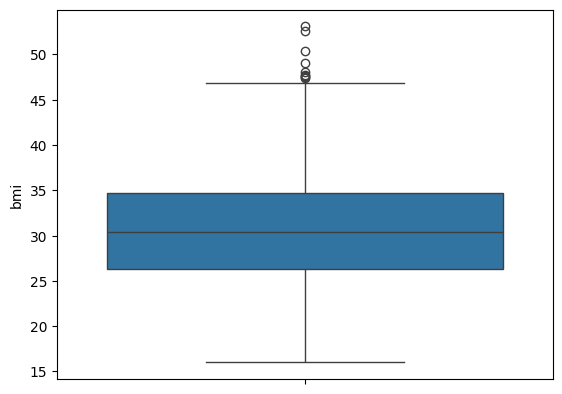

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
#Due to the presence of outliers present in bmi column
# we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.699999999999998
47.300000000000004


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 12.3 MB/s eta 0:00:00


<Axes: ylabel='bmi'>

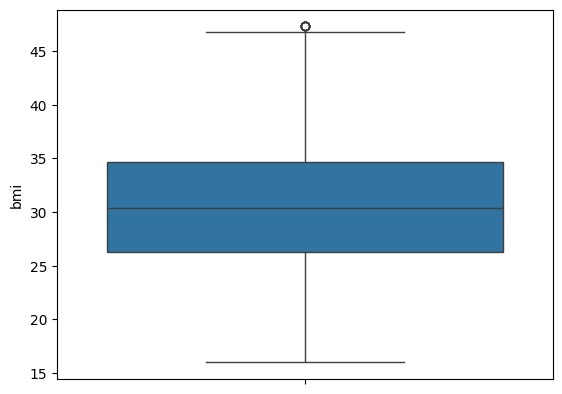

In [ ]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])
#now we have successfully removed the outliers

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [ ]:
df['bmi'].skew()
df['age'].skew()
#Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model's learning.

np.float64(0.054780773126998195)

Encoding is to be done for discrete categorical data (sex,bmi,region).

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.112069,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044843,-0.017848,-0.076596,-0.008998,-0.058045
bmi,0.112069,-0.044843,1.000000,0.013574,0.003369,0.156839,0.199298
children,0.041536,-0.017848,0.013574,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003369,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156839,-0.002842,0.012736,1.000000,0.010767
expenses,0.298308,-0.058045,0.199298,0.067389,0.787234,0.010767,1.000000


**Model Development**
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

1.Linear Regression Model:

Training R2 Score: 0.7295673146243207
Test R2 Score: 0.8062261856473878
Training RMSE: 6084.915908113417
Test RMSE: 5967.169706303578

Actual vs Predicted Expenses (Linear Regression Test Set):
        Actual     Predicted
900    8688.86   7794.303514
1064   5708.87   5699.564737
1256  11436.74  14490.610887
298   38746.36  31872.078894
237    4463.21   9210.508736
481    9304.70  13400.303108
240   38511.63  30003.584817
277    2150.47   1423.277953
415    7345.73  10871.106695
707   10264.44  11492.366853
370   13415.04  10584.212740
331   24393.62  33298.645139
1249  37607.53  30646.664184
895   13063.88  17283.693655
637   24915.05  10357.583644
497    8027.97   9491.495118
210    1980.07   4095.340233
49    38709.18  31983.418956
737    3484.33   3204.914023
76     3947.41   5513.396819


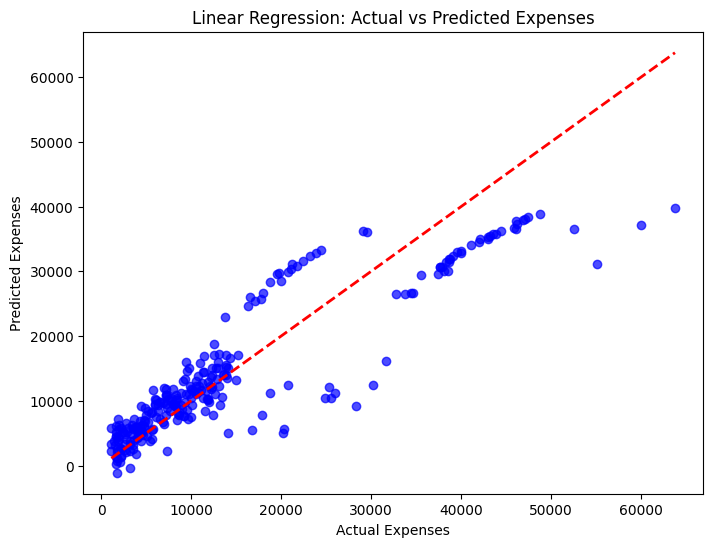

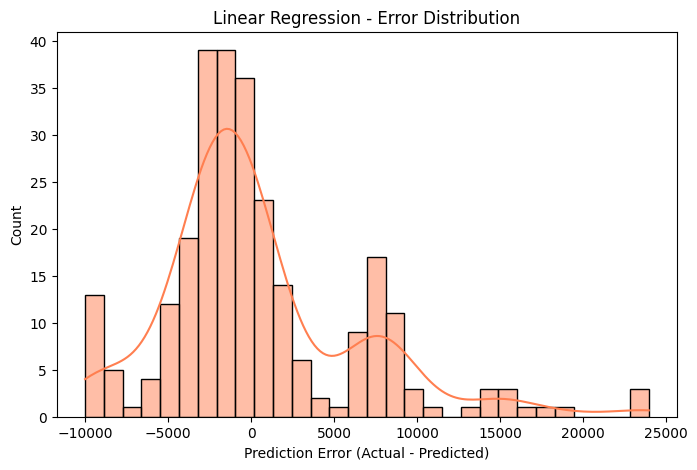

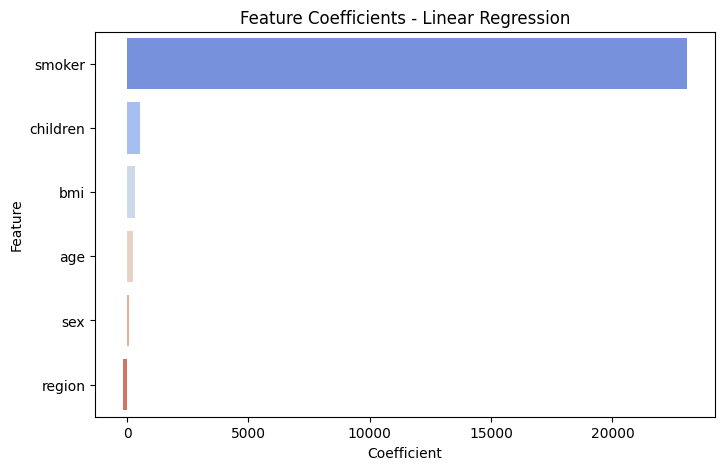

In [ ]:
# Linear Regression on Insurance Dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Split features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Step 5: Evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Step 6: Actual vs Predicted comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (Linear Regression Test Set):")
print(comparison.head(20))

# Step 7: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Linear Regression: Actual vs Predicted Expenses")
plt.show()

# Step 8: Error Distribution
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.title("Linear Regression - Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

# Step 9: Coefficients (Feature Importance for Linear Regression)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title("Feature Coefficients - Linear Regression")
plt.show()




2.Polynomial Regression

Training R2 Score: 0.832596847966006
Test R2 Score: 0.8836976011110942
Training RMSE: 4787.4781621074035
Test RMSE: 4622.907264593296

Actual vs Predicted Expenses (Test Set):
        Actual     Predicted
900    8688.86   9004.806716
1064   5708.87   6567.478233
1256  11436.74  14394.056662
298   38746.36  36037.785850
237    4463.21   6068.947151
481    9304.70  11213.596672
240   38511.63  38873.703464
277    2150.47   3415.689041
415    7345.73   9082.173876
707   10264.44  12275.941899
370   13415.04  12836.187464
331   24393.62  27909.419822
1249  37607.53  33944.612547
895   13063.88  13317.340373
637   24915.05   8442.560037
497    8027.97   9158.897747
210    1980.07   3113.036077
49    38709.18  37250.434442
737    3484.33   4393.428392
76     3947.41   6055.223536


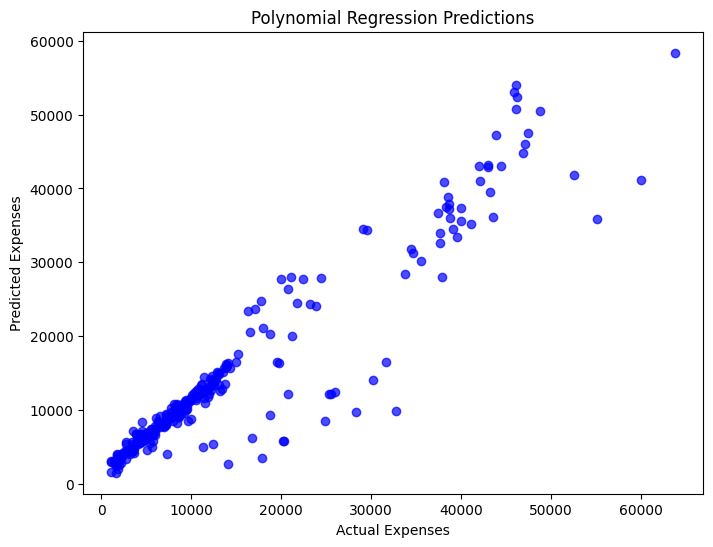

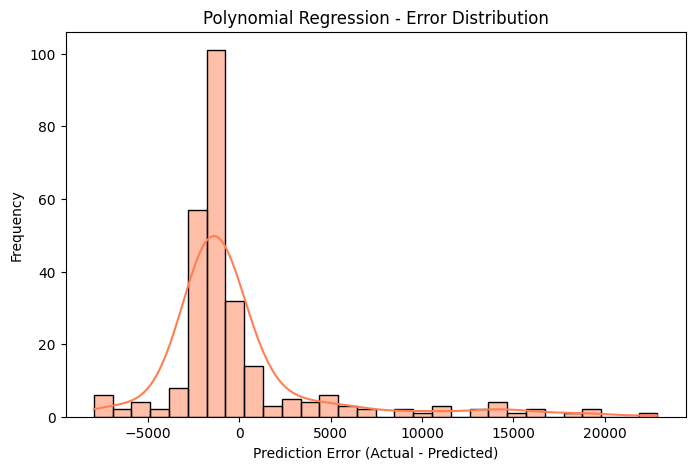

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features (X) and target (y)
X = df.drop('expenses', axis=1)
y = df['expenses']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (important for polynomial features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply Polynomial Features (degree can be adjusted)
poly = PolynomialFeatures(degree=2, include_bias=False)  # you can change degree=3 for higher-order
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# Step 5: Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 6: Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Step 7: Evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (Test Set):")
print(comparison.head(20))


# Optional: Compare predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b')
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Polynomial Regression Predictions")
plt.show()

# Error distribution for Polynomial Regression
# Calculate prediction errors
errors = y_test - y_test_pred

# Plot the error distribution
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.title("Polynomial Regression - Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()



3.KNN Regression

Training R2 Score: 0.8621008179129206
Test R2 Score: 0.8579467599125272
Training RMSE: 4345.160626808958
Test RMSE: 5109.123693576509

Actual vs Predicted Expenses (KNN Test Set):
        Actual  Predicted
900    8688.86   9943.634
1064   5708.87   8174.566
1256  11436.74  16508.518
298   38746.36  34008.102
237    4463.21   5320.404
481    9304.70   8206.770
240   38511.63  42404.860
277    2150.47   2266.264
415    7345.73   8280.884
707   10264.44   9665.530
370   13415.04  16380.034
331   24393.62  33684.260
1249  37607.53  35424.860
895   13063.88  14670.668
637   24915.05   8450.944
497    8027.97   8932.758
210    1980.07   6781.176
49    38709.18  39829.272
737    3484.33   4711.902
76     3947.41   7288.372


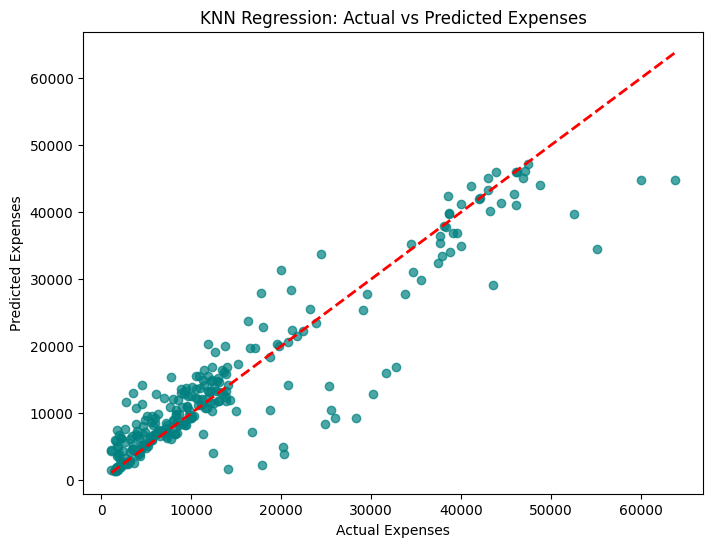

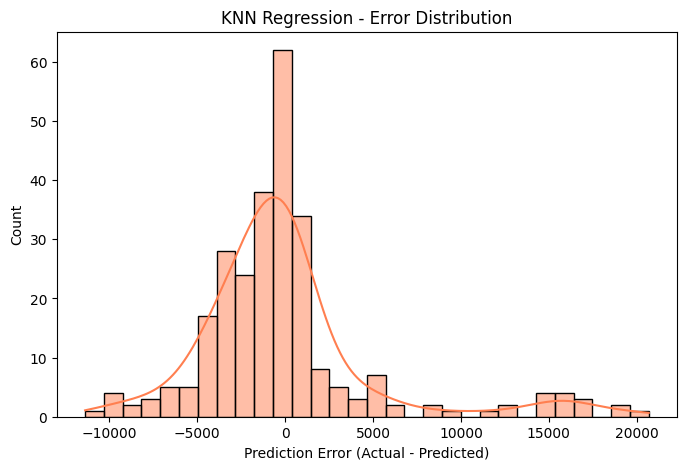

In [ ]:
# KNN Regression on Insurance Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Split features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (essential for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and fit KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # you can tune this value
knn.fit(X_train_scaled, y_train)

# Step 5: Predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Step 6: Evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Step 7: Actual vs Predicted comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (KNN Test Set):")
print(comparison.head(20))

# Step 8: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("KNN Regression: Actual vs Predicted Expenses")
plt.show()

# Step 9: Error Distribution
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.title("KNN Regression - Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()


4.Decision Tree Regression

Training R2 Score: 0.8678824255916621
Test R2 Score: 0.8935273624716735
Training RMSE: 4253.096985852359
Test RMSE: 4423.233350741171

Actual vs Predicted Expenses (Decision Tree Test Set):
        Actual     Predicted
900    8688.86  12504.994231
1064   5708.87   4098.154423
1256  11436.74  10370.819667
298   38746.36  42308.451579
237    4463.21   6703.788395
481    9304.70  10370.819667
240   38511.63  35310.095185
277    2150.47   1827.315111
415    7345.73   9838.579000
707   10264.44  10370.819667
370   13415.04  15043.575833
331   24393.62  25517.316154
1249  37607.53  42308.451579
895   13063.88  15043.575833
637   24915.05   7407.174069
497    8027.97   9838.579000
210    1980.07   4098.154423
49    38709.18  42308.451579
737    3484.33   4098.154423
76     3947.41   4098.154423


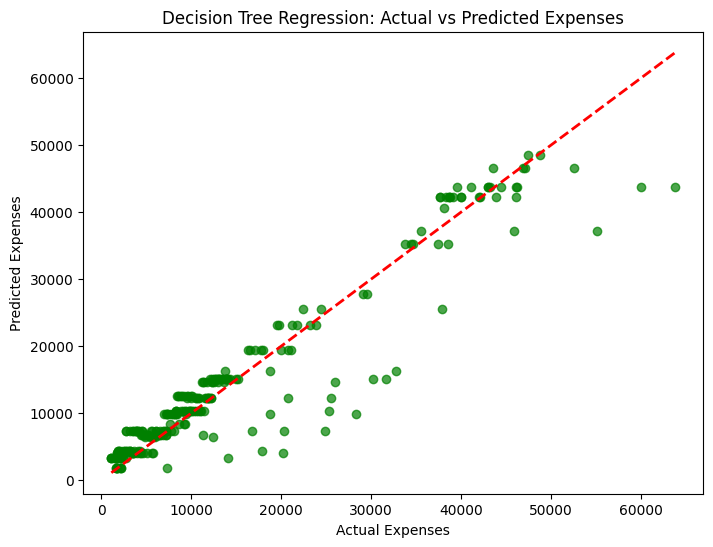

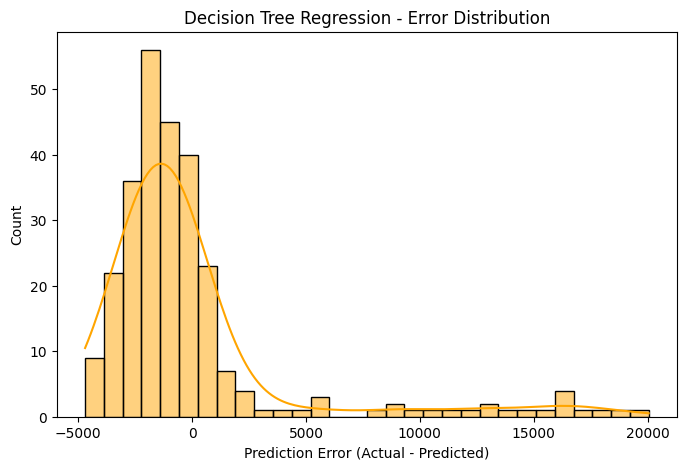

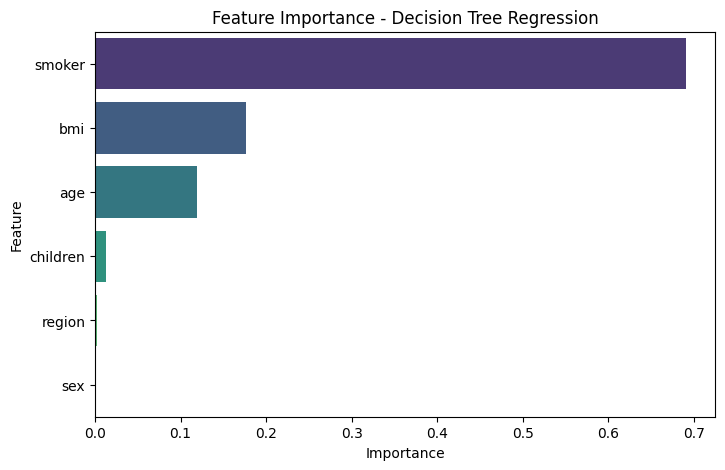

In [ ]:
# Decision Tree Regression on Insurance Dataset

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Split features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and fit Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # you can tune depth
dt_model.fit(X_train, y_train)

# Step 4: Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Step 5: Evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Step 6: Actual vs Predicted comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (Decision Tree Test Set):")
print(comparison.head(20))

# Step 7: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Decision Tree Regression: Actual vs Predicted Expenses")
plt.show()

# Step 8: Error Distribution
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Decision Tree Regression - Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

# Step 9: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance - Decision Tree Regression")
plt.show()


5.Support Vector Regression Model

Training R2 Score: 0.8792130169098553
Test R2 Score: 0.8277636076903936
Training RMSE: 4066.6337197984385
Test RMSE: 5625.787260780782

Actual vs Predicted Expenses (SVR Test Set):
        Actual     Predicted
900    8688.86   8032.296007
1064   5708.87  13920.218454
1256  11436.74  12468.463747
298   38746.36  36108.877688
237    4463.21   4325.015458
481    9304.70   9838.414986
240   38511.63  55444.724631
277    2150.47   3332.794343
415    7345.73   8237.517109
707   10264.44   9305.976649
370   13415.04   9875.019917
331   24393.62  26712.085454
1249  37607.53  35351.880953
895   13063.88  15952.891139
637   24915.05   6989.977170
497    8027.97   8770.450701
210    1980.07   2608.466734
49    38709.18  38773.729426
737    3484.33   4734.237801
76     3947.41   4292.204965


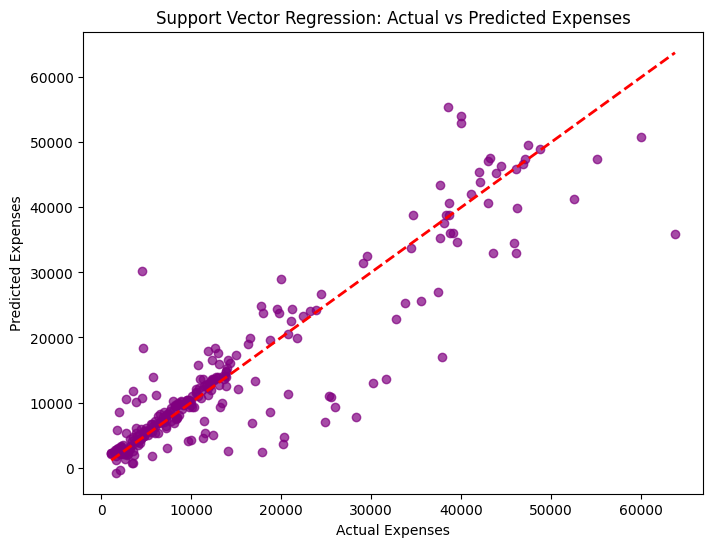

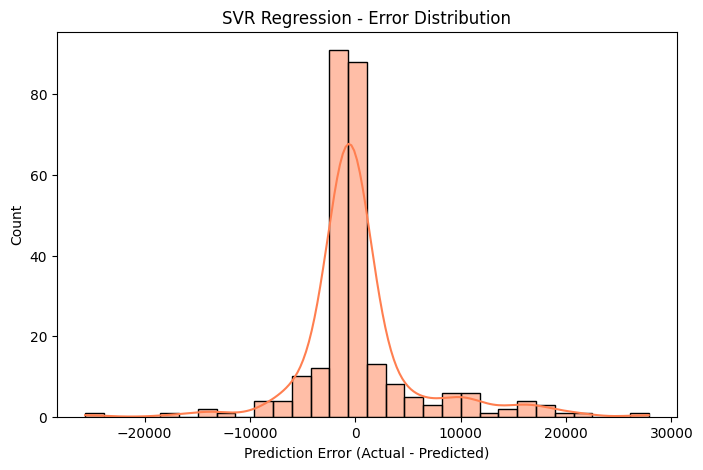

In [ ]:
# Support Vector Regression (SVR) on Insurance Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Split features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y for scaling
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Step 4: Initialize and train SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # C and epsilon can be tuned
svr.fit(X_train_scaled, y_train_scaled)

#Step 5: Predictions (remember to inverse transform)
y_train_pred_scaled = svr.predict(X_train_scaled)
y_test_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform predictions to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Step 6: Evaluation metrics
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Step 7: Actual vs Predicted comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (SVR Test Set):")
print(comparison.head(20))

# Step 8: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Support Vector Regression: Actual vs Predicted Expenses")
plt.show()

# Step 9: Error Distribution
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.title("SVR Regression - Error Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

6.Random Forest Regression Model

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Random Forest Regression (Tuned - RandomizedSearchCV):
Training R2 Score: 0.9553864839471256
Test R2 Score: 0.8773607517016021
Training RMSE: 2471.486351153005
Test RMSE: 4747.178752817185

Actual vs Predicted Expenses (Test Set):
        Actual     Predicted
900    8688.86   9889.535514
1064   5708.87   8269.452678
1256  11436.74  14446.690212
298   38746.36  36420.752053
237    4463.21   6098.910559
481    9304.70   9798.665492
240   38511.63  37876.801393
277    2150.47   3115.951122
415    7345.73   9443.015128
707   10264.44  11350.632372
370   13415.04  13406.530738
331   24393.62  25743.439335
1249  37607.53  39020.799300
895   13063.88  14900.084971
637   24915.05   7249.271700


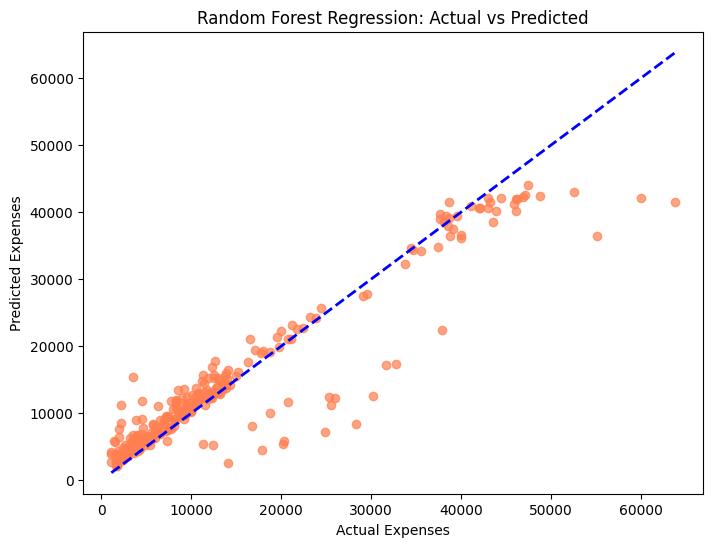

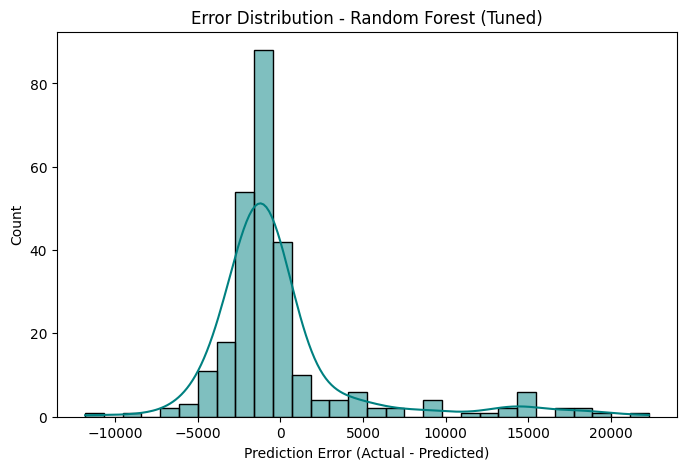

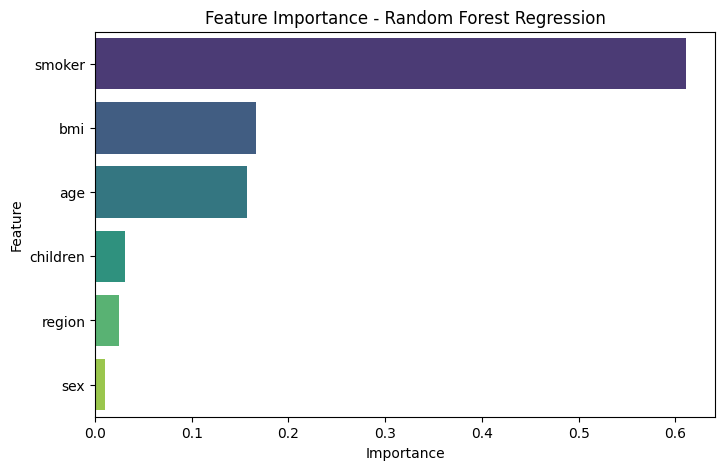

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Split features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Base model
rf = RandomForestRegressor(random_state=42)

# Parameter grid (smaller, random subset)
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Randomized Search (faster)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # number of random combinations
    cv=3,                     # 3-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("\nBest Parameters Found:", random_search.best_params_)

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Evaluation
print("\nRandom Forest Regression (Tuned - RandomizedSearchCV):")
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nActual vs Predicted Expenses (Test Set):")
print(comparison.head(15))

# Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

# Error Distribution
errors = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='teal')
plt.title("Error Distribution - Random Forest (Tuned)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance - Random Forest Regression")
plt.show()




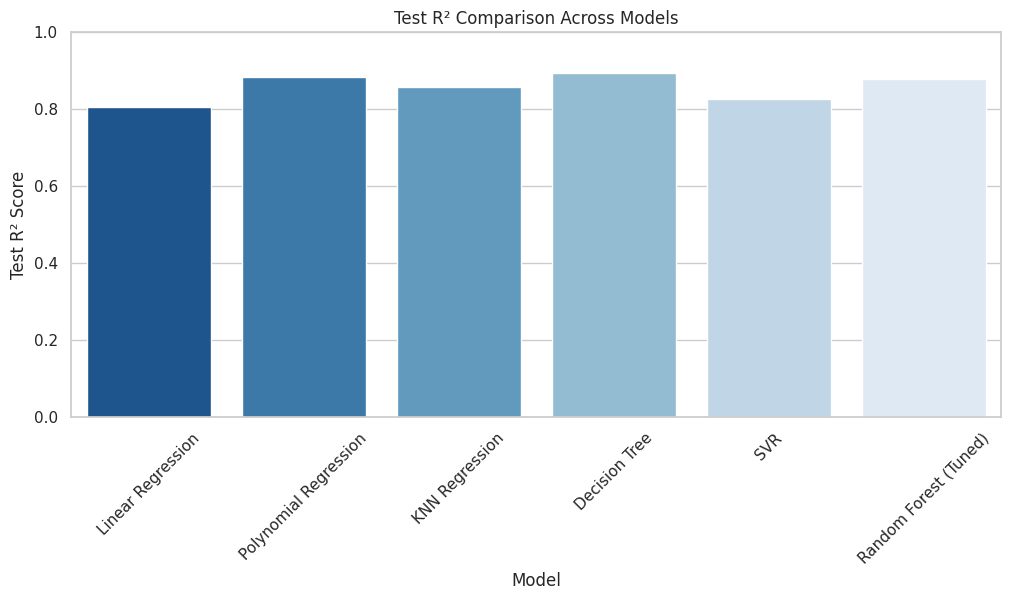

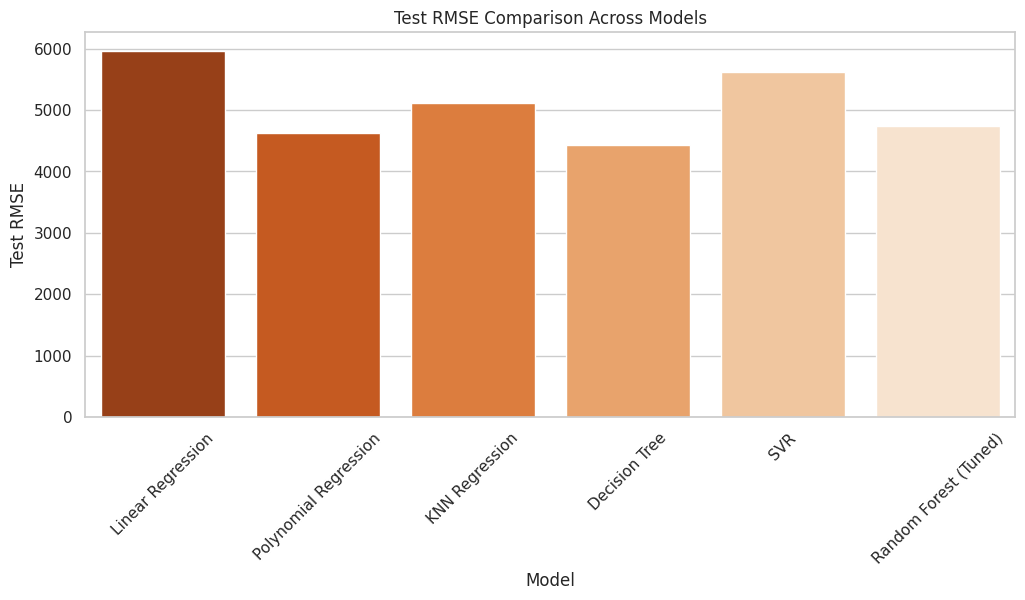

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Create a performance summary dataframe
performance = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Polynomial Regression',
        'KNN Regression',
        'Decision Tree',
        'SVR',
        'Random Forest (Tuned)'
    ],
    'Test R2': [
        0.8062, 0.8837, 0.8579, 0.8935, 0.8277, 0.8774
    ],
    'Test RMSE': [
        5967, 4623, 5109, 4423, 5626, 4747
    ]
})

# Step 2: Set style
sns.set(style="whitegrid")

# Step 3: Plot Test R2
plt.figure(figsize=(12,5))
sns.barplot(x='Model', y='Test R2', data=performance, palette='Blues_r')
plt.title("Test R² Comparison Across Models")
plt.ylabel("Test R² Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Step 4: Plot Test RMSE
plt.figure(figsize=(12,5))
sns.barplot(x='Model', y='Test RMSE', data=performance, palette='Oranges_r')
plt.title("Test RMSE Comparison Across Models")
plt.ylabel("Test RMSE")
plt.xticks(rotation=45)
plt.show()
